In [11]:
from gaiaunlimited import DR3SelectionFunctionTCG

In [12]:
mapHpx7 = DR3SelectionFunctionTCG()
# loads empirical, M10 based selection function from TCG et al. 2023
# options include hpx7 (default) which used order 7 healpix everywhere,
# 'multi' which use up to order 10 in dense regions, and 'patch' for 
# order 12 maps on the fly
# use is in .query(coords,G) method, which evaluates TCG SF at magnitude G and coord
# just make sure coords have at least one point per healpix 

Creating directory /Users/hopkinsm/.gaiaunlimited


allsky_M10_hpx7.hdf5?raw=true: 100%|██████| 4.50M/4.50M [00:00<00:00, 87.1MiB/s]


In [14]:
from gaiaunlimited.utils import get_healpix_centers
coords_of_centers = get_healpix_centers(7)
import numpy as np
gmag = np.ones_like(coords_of_centers) * 21.
print(f'Computing the completeness for {len(coords_of_centers)} points.')
completeness = mapHpx7.query(coords_of_centers,gmag)

Computing the completeness for 196608 points.


In [16]:
print(completeness)

[0.72350425 0.71772665 0.69901098 ... 0.69006834 0.73700795 0.67268723]


In [24]:
import healpy as hp
# hp.mollview(completeness,
#             coord=['Celestial','Galactic'] # I think converts healpix index (corresponding to
#             # order in equatorial) to Galactic coords
#            )
# hp.mollview(completeness,
#             coord=['C','G'] # same as above. Due to confusion in labels, use above
#            )
# hp.mollview(completeness,
#             # shows default is Celestial (RA,dec), this is tilt of solar system
#            )
# hp.mollview(completeness,
#             coord=['C','E'] # mapping to Equatorial shows symmettry of scanning relative to Solar System
#            )
# hp.mollview(completeness,
#             coord=['G'] # shows putting one only changes label, doesn't do transform
#            )

In [35]:
def plotCompleteness(G, coords=get_healpix_centers(7), map=DR3SelectionFunctionTCG()):
    gArray = np.ones_like(coords)*G
    completeness = map.query(coords,gArray)
    hp.mollview(completeness,
                coord=['Celestial','Galactic']
               )

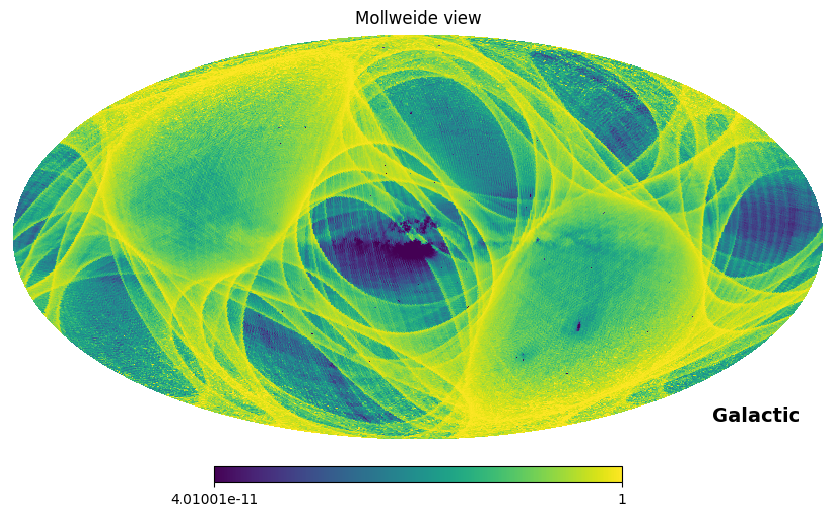

In [36]:
plotCompleteness(21)

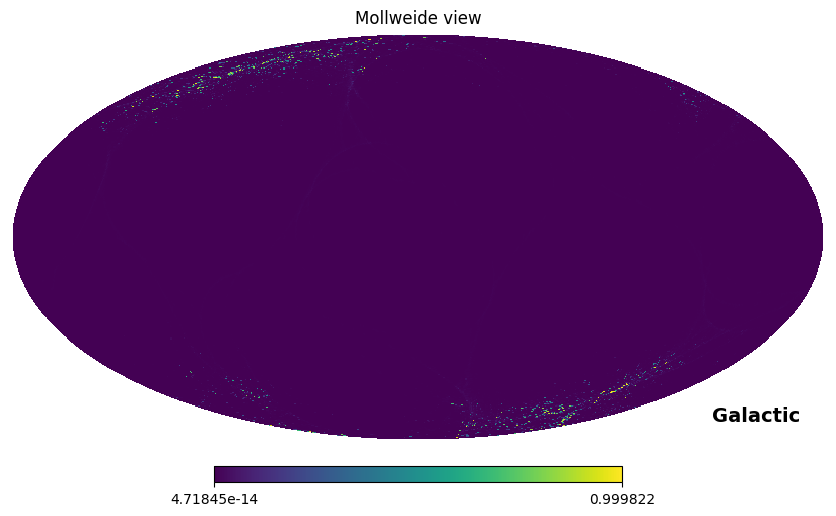

In [37]:
plotCompleteness(21.5)

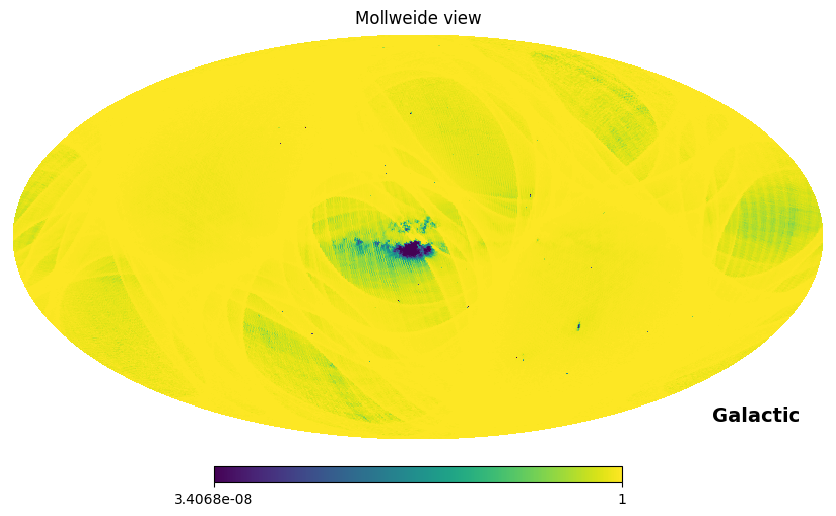

In [38]:
plotCompleteness(20.5)

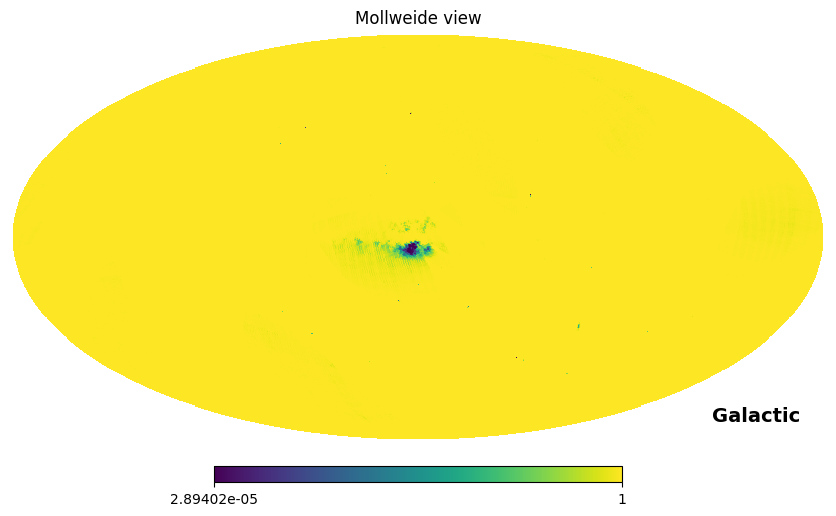

In [39]:
plotCompleteness(20)

I think I understand the parent selection function! Consider if I need to use multi map, to better resolve the selection of GC (Galactic Centre) and GC (Globular Cluster) healpix.
GC fields remain at low completion even for magnitudes of 19 and less.
Other than this sky complete at G=20.
Between G=20 and G=21.5, completeness drops to essentially 0.

Now looking at example RVS SF:

In [60]:
from gaiaunlimited.selectionfunctions import DR3RVSSelectionFunction
import matplotlib.pyplot as plt
rvssf = DR3RVSSelectionFunction()

def plot_rvs(gval, cval):
    cc = get_healpix_centers(5)
    prob = rvssf.query(cc, g=np.ones_like(cc, dtype=float)*gval, c=np.ones_like(cc, dtype=float)*cval)

    fig = plt.figure(figsize=(10,3))
    hp.mollview(prob, fig=fig, sub=122, title=f"G={gval:.1f}, G-RP={cval:.1f}",
                margins=[0,0,0,0.1], min=0, max=1)

def med_rvs(gval, cval):
    cc = get_healpix_centers(5)
    prob = rvssf.query(cc, g=np.ones_like(cc, dtype=float)*gval, c=np.ones_like(cc, dtype=float)*cval)

    return np.nanmedian(prob)
    

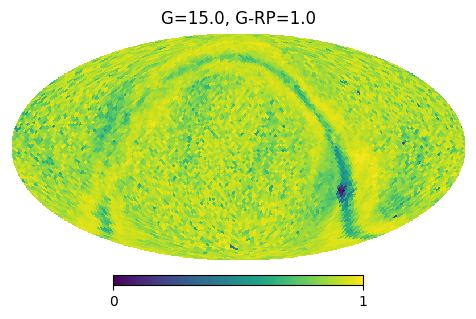

In [47]:
plot_rvs(15, 1)

In [62]:
for c in [-0.2,0.2,0.6,1,1.4,1.8]:
    print(med_rvs(15, c))
# I assume nans are regions with fewer than 20 OR just zero stars per bin
# note a much brighter cutoff in RVS selection - restricts my sample to\
# close by or young stars - complicated!

0.3333333333333333
0.25
0.09183673469387754
0.8795180722891566
0.6666666666666666
0.35571587125416204
